## 로지스틱 회귀 분류

### 1) 데이터 준비

In [1]:
import pandas as pd

In [3]:
## 데이터 준비하기
file_path = '../data/05_생선_분류_데이터셋.csv'
fish = pd.read_csv(file_path)
fish

# Species	Weight	Length	Diagonal	Height	Width
# 종류       무게     길이     대각선     높이     두께

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


### 2) 데이터 전처리

In [ ]:
# 머신러닝 데이터 전처리는 독립변수와 종속변수를 
# 훈련/테스트 데이터로 나누기 위해 각 2차원/1차원
# 형태의 데이터셋으로 만들어주는 작업이 필요하다

In [15]:
## 종류 특성(종속변수)의 고유한 값 조회
print(fish['Species'].unique())
print(len(fish['Species'].unique()))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
7


In [7]:
## 독립변수 추출
# - 변수명은 fish_data
# - 사이킷런 훈련에 사용하는 형태로 추출
fish_data = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_data

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [14]:
# 상위 5개 추출
fish_data[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [11]:
## 종속변수 만들기
# - 변수명 : fish_target
fish_target = fish['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [ ]:
## 훈련/테스트데이터 나누기
# - seed = 42

In [12]:
from sklearn.model_selection import train_test_split

In [18]:
train_data, test_data, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

# 차원 확인
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(119, 5)
(40, 5)
(119,)
(40,)


### 3) 정규화(표준화) - 스케일링

In [19]:
### 정규화(표준화) : 스케일 표준화
# - 변수 : train_scaled, test_scaled
import numpy as np

In [25]:
### 정규화(표준화)
# 1. 정규화 : 스케일이 다른 항목들을 "표준점수"로 동일하게 표준화시키기
#   - 표준점수는 사이킷런에서 제공하는 클래스(모델) 사용

#  <정규화 순서>
#   1.1 정규화(표준점수) 클래스 생성 : StandardScaler()
#   1.2 훈련 시키기 : fit(훈련데이터) -> 스스로 표준점수 생성
#   1.3 변환하기 : transform(훈련데이터) -> 표준점수로 변환하기
#   1.4 표준점수에 사용된 5개 항목에 대한 평균과, 표준편차 확인
#      - StandardScaler 클래스 내에 mean_, scale_ 변수에 저장되어 있음

## 라이브러리 생성
from sklearn.preprocessing import StandardScaler

## 클래스(모델) 생성
ss = StandardScaler()

## 스스로 표준점수 생성
ss.fit(train_data)

## 훈련데이터를 표준점수로 변환하기
train_scaled = ss.transform(train_data)
## 테스트데이터를 표준점수로 변환하기
test_scaled = ss.transform(test_data)

## 샘플 5개 행 출력해 보기
train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

### 4) k-최근접이웃 분류 모델 테스트

In [26]:
### k-최근접이웃 분류모델로 테스트
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [31]:
kn = KNeighborsClassifier(n_neighbors=3)

kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
'''
훈련데이터 정확도가 테스트데이터 정확도보다 크므로 과대적합이 있을 가능성이 있다.
하지만 훈련데이터 정확도가 좋게 나왔다.
'''

In [35]:
### 테스트데이터 상위 5개로 예측
# [[실제값, 예측값], [실제값, 예측값]]
result = np.column_stack((test_target[:5], kn.predict(test_scaled[:5])))
result

array([['Perch', 'Perch'],
       ['Smelt', 'Smelt'],
       ['Pike', 'Pike'],
       ['Whitefish', 'Perch'],
       ['Perch', 'Perch']], dtype=object)

In [41]:
## 각 행의 범주율의 확률값 확인
# - 확률값의 범위 : 0~1 (0%~100%)
# - 확률값 조회 함수 : predict_proba(테스트데이터)
# - 사이킷런 분류보델 공통으로 사용됨
proba = kn.predict_proba(test_scaled[:5])
# proba
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

---
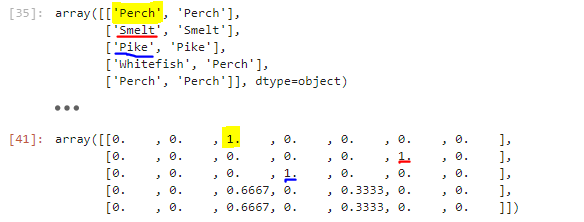

---

In [43]:
print(fish['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [45]:
## 훈련모델이 가지고 있는 범주의 리스트 값 확인
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
'''
훈련을 시키면 데이터 범주 항목 순서가 달라진다. 
kn.classes_ 값에 해당하는 자리에 범주율 1 등 확률값이 표기됨

이웃값 확인을 통해 확률값이 어떻게 나왔는지 확인해보자
'''

In [86]:
## 5개의 데이터 이웃 확인
# - 각 행마다 이웃이 3개씩
distances, indexes = kn.kneighbors(test_scaled[:5])
print(indexes)
print('\n')
for test in test_scaled[:5] :
    distances, indexes = kn.kneighbors([test])
    print(train_target[indexes])

[[ 39  64  63]
 [ 93  99  43]
 [100 105  27]
 [104 115 106]
 [ 72  26  68]]


[['Perch' 'Perch' 'Perch']]
[['Smelt' 'Smelt' 'Smelt']]
[['Pike' 'Pike' 'Pike']]
[['Roach' 'Perch' 'Perch']]
[['Perch' 'Perch' 'Roach']]


### 5) 로지스틱 회귀분류(이진분류)
- 시그모이드 함수

In [ ]:
## 선형방정식 사용 : 다중회귀 방정식과 동일
# - z = a*x1 + b*x2 + ... + y절편
# - z값 구하는 함수 : decision_function(훈련데이터)
# - z값의 범위(확률적 계산) : 0보다 작거나 크거나
## 확률 : 0~1사이 값을 사용(0%~100%)
# - 따라서, z값은 확률 0~1 사이의 값으로 변환하는 작업이 필요
# - 시그모이드 방식(이진분류), 소프트맥스 방식(다중분류)

In [89]:
# 사용 : train_scaled, train_target

In [110]:
## 이진분류 방식은 2개의 범주만 사용 가능
# - 기존 데이터에서 2개(Bream과 Smelt) 범주만 추출하여 사용
# 독립변수명 : train_bream_smelt
# 종속변수명 : target_bream_smelt

array([0.91965782, 0.60943175, 0.81041221, 1.85194896, 1.00075672])

In [161]:
target_bream_smelt = train_target[(train_target == 'Bream') | 
                                  (train_target == 'Smelt')]
target_bream_smelt.shape

(33,)

In [164]:
train_bream_smelt = train_scaled[(train_target == 'Bream') | 
                                  (train_target == 'Smelt')]
train_bream_smelt.shape

(33, 5)

In [150]:
bsindex = np.where((train_target == 'Bream') | (train_target == 'Smelt'))
bsindex = bsindex[0]
bsindex

train_bream_smelt=np.empty((0, 5))

for i in bsindex :
    train_bream_smelt = np.append(train_bream_smelt, 
                                  np.array([train_scaled[i]]), axis = 0)
    
train_bream_smelt

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174],
       [-1.0824759 , -1.61150165, -1.62162731, -1.7000674 , -1.92815631],
       [ 0.10337949,  0.04717013,  0.23714575,  0.88445197,  0.41799764],
       [ 1.49668216,  1.03112796,  1.21864741,  2.44274986,  1.40289707],
       [ 0.23004337,  0.23459067,  0.42823457,  1.3336029 ,  0.39983213],
       [-0.42579405, -0.29018684, -0.11028847,  0.65627104, -0.26107519],
       [ 1.28557569,  0.70314202,  0.89727076,  1.98228866,  1.06683526],
       [ 0.93373158,  0.60943175,  0.83646978,  1.85150445,  0.97832415],
       [ 0.80706771,  0.60943175,  0.81041221,  1.63137406,  1.0255057 ],
       [-1.07262426, -1.52716241, -1.5

In [165]:
## 이진분류
from sklearn.linear_model import LogisticRegression

In [173]:
lg = LogisticRegression()

lg.fit(train_bream_smelt, target_bream_smelt)
lg.score(train_bream_smelt, target_bream_smelt)

1.0

In [174]:
## 상위5개 예측
lg.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [176]:
# 5개 행에 대한 범주별 확률 조회
lg.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [181]:
# 훈련모델이 가지고 있는 범주의 순서
print(lg.classes_)

['Bream' 'Smelt']


In [180]:
# 계수(또는 가중치) 및 y절편값 조회
print(lg.coef_, lg.intercept_)

# 

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
'''
훈련모델 범주 및 컬럼은 오름차순으로 바뀜 ( Diagonal, Height, Length, Weight, Width )

<로지스틱회귀방정식>
z = -0.403*Diagonal -0.576*Height -0.663*Length -1.013*Weight -0.732*Width -2.162
'''

In [186]:
## 이준분류에서 z값(선형방정식의 결과값들)을 0~1로 변환
# z값 조회
decisions = lg.decision_function(train_bream_smelt[:5])
print('z값 = ', decisions)

## 시그모이드 함수 : 싸이파이 패키지의 expit()
# 0~1 사이 값으로 변환
from scipy.special import expit
print('시그모이드 변환값(0~1) =', expit(decisions))

z값 =  [-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
시그모이드 변환값(0~1) = [0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
## <시그모이드 함수(sigmoid function) 또는 로지스틱함수>
# - 이진분류라고 하며
# - 범주가 2개일 때 주로 사용됨

# - 사용 패키지 : from scipy.special
# - 사용 모듈 : import expit
# - 사용 함수 : expit(값)

# - 0/1, y/n처럼 둘중 하나로 분류할 때 
# -기존 knn에서 사용했었음
# - 시그모이드 값의 범위 0과 1사잇값
# - 범주들의 z값을 기준으로 0과 1의 사잇값으로 변환하여 반환

# - 변환 공식 : 1/(1+np.exp^(-z))
#  : np.exp() : 지수값으로 변화하는 함수(0~1)
#  : -z : z값은 음수 사용
#  : z=0일때, 확률은 0.5
#  : z>0일때, 확률은 > 0.5(51% 이상) > 예측 확률이 높음
#  : z<0일때, 확률은 < 0.5(49% 미만)
# - 여러 개 범주들 중에 확률이 가장 높은

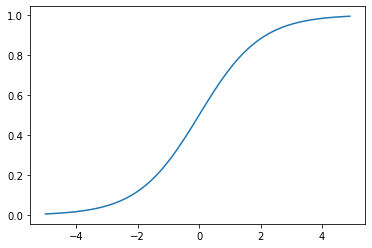

In [190]:
## 시그모이드 함수 예시
import numpy as np
import matplotlib.pyplot as plt

## 임의 z값
z = np.arange(-5,5,0.1)

## 시그모이드 공식 사용
# - np.exe() : 0~1의 지수로 변환
# : z값의 스케일을 통일시키기 위해서
# : z값은 음수로 처리(제곱승 시에 분모로 꼐산)
# : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1/(1+np.exp(-z))

plt.plot(z, phi)
plt.show()

### 6) 로지스틱 회귀분류(다중분류)

In [ ]:
## 다중분류는 모든 범주를 사용합니다.
# - 독립변수도 모든 특성을 사용합니다.
# - 모든 특성을 사용하다 보니 복잡도에 대한 부분을 고려해야 합니다
#   (너무 복잡해도 안되고, 느슨해도 안되고.. 적당히)
# - 사용하는 클래스 : 이진분류와 동일
# - 복잡도를 강약으로 조절하기 위해 규제강도 조절값 사용
# - 규제강도 조절값 속성명 : C (대문자), 기존의 alpha와 같음
#   : alpha값은 클수록 강도가 커졌다면,
#   : C값은 작을수록 강도가 커집니다.
#   : 기본값은 1, 보통 20 정도로 완화시킨 후 진행
# - 훈련반복횟수 사용
#   : 훈련모델은 정확도를 높이기 위해 일반적으로 반복 수행을 합니다.
#   : 기본 반복횟수 : 100회
#   : 훈련 중에 100회보다 더 해야 하는 경우 경고 창이 뜨는 경우 있음
#   : 독립변수의 특성이 많을수록 훈련 반복횟수가 늘어나는 경우 발생
#   : 반복횟수 속성값 : max-iter
#   : 보통 반복횟수를 1000으로 놓고 진행하는 경우가 많음
# - 이외 모든 훈련 함수는 기존과 동일

In [ ]:
### 규제강도 = 20
### 반복회수 = 1000회
# 훈련/테스트데이터에 대한 정확도 확인

In [193]:
lg_n = LogisticRegression(C=20, max_iter=1000)

lg_n.fit(train_scaled, train_target)

print(lg_n.score(train_scaled, train_target))
print(lg_n.score(test_scaled, test_target))

0.9327731092436975
0.925


In [197]:
## 상위 5건으로 예측 진행
lg_n.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [201]:
## 전체 범주별 확률 확인
proba = lg_n.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [196]:
print(lg_n.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [202]:
print(lg_n.coef_)
print(lg_n.intercept_)

[[-1.48987946 -1.029909    2.59435577  7.70317372 -1.20033002]
 [ 0.19634499 -2.00943135 -3.7804282   6.50475209 -1.9951452 ]
 [ 3.56251098  6.34407205 -8.49003212 -5.75747082  3.79323712]
 [-0.10502305  3.60283367  3.93064404 -3.61704957 -1.75100031]
 [-1.40029338 -6.07529102  5.25937883 -0.87225719  1.86066904]
 [-1.38534035  1.49231096  1.39234246 -5.67722609 -4.40100373]
 [ 0.62168026 -2.32458532 -0.90626079  1.71607787  3.6935731 ]]
[-0.09215557 -0.2629502   3.25077384 -0.14657998  2.65465801 -6.78789398
  1.38414788]


In [205]:
# z값 조회
decisions = lg_n.decision_function(test_scaled[:5])
print(np.round(decisions, decimals=3))

[[ -6.498   1.032   5.163  -2.727   3.339   0.326  -0.635]
 [-10.86    1.927   4.77   -2.396   2.978   7.841  -4.26 ]
 [ -4.335  -6.233   3.174   6.488   2.357   2.421  -3.872]
 [ -0.684   0.453   2.647  -1.186   3.264  -5.753   1.258]
 [ -6.397  -1.993   5.815  -0.109   3.503  -0.112  -0.707]]


In [207]:
## 소프트맥스(softmax)
# 사용하는 패키지 : scipy.special
# 사용하는 모듈 : softmax
from scipy.special import softmax
proba = softmax(decisions, axis = 1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
